In [1]:
# autoreload magic
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from mindreadingautobots.analysis.analysis_config import SPREADSHEET_NAMES, BF_VALS, NAME_TEMPLATES, DATASET_NAMES
from mindreadingautobots.analysis.analysis_config import spreadsheet_to_dataframe
target_directory = "../processed/"

### Extra analysis: Improved LSTM hypers versus original transformer hypers

In [31]:
# download the latest smajority data
bf_vals = [0, 1, 2, 5, 7.5]
sheetname_template = NAME_TEMPLATES[4] + "_results"
df_sparity_rerun = spreadsheet_to_dataframe("LSTM_sparity_21_4_good_hyper", bf_vals, sheetname_template, models=["RNN"])
# df.to_csv(f"./processed/{SPREADSHEET_NAME}.csv", index=False)

Loading: RNN_sparse_parity_k4_nbits21_n5000_bf0_seed1234_results
Loading: RNN_sparse_parity_k4_nbits21_n5000_bf1_seed1234_results
Loading: RNN_sparse_parity_k4_nbits21_n5000_bf2_seed1234_results
Loading: RNN_sparse_parity_k4_nbits21_n5000_bf5_seed1234_results
Loading: RNN_sparse_parity_k4_nbits21_n5000_bf7.5_seed1234_results


In [33]:
bf_vals = [1, 2, 5]
sheetname_template = NAME_TEMPLATES[4] + "_results"
df_sparity_san_rerun = spreadsheet_to_dataframe("Extra_SAN_SPARITY_21_4_most_fail", bf_vals, sheetname_template, models=["SAN"])
# df.to_csv(f"./processed/{SPREADSHEET_NAME}.csv", index=False)


Loading: SAN_sparse_parity_k4_nbits21_n5000_bf1_seed1234_results
Loading: SAN_sparse_parity_k4_nbits21_n5000_bf2_seed1234_results
Loading: SAN_sparse_parity_k4_nbits21_n5000_bf5_seed1234_results


In [32]:
bf_vals = [7.5, 10]
sheetname_template = NAME_TEMPLATES[4] + "_results"
df_sparity_san_rerun_2 = spreadsheet_to_dataframe("Extra_SAN_SPARITY_21_4_percentage_check", bf_vals, sheetname_template, models=["SAN"])
# df.to_csv(f"./processed/{SPREADSHEET_NAME}.csv", index=False)


Loading: SAN_sparse_parity_k4_nbits21_n5000_bf7.5_seed1234_results
Loading: SAN_sparse_parity_k4_nbits21_n5000_bf10_seed1234_results


C:\Users\peter\AppData\Local\Temp\ipykernel_14552\2238379642.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(np.abs(accs - target) < epsilon) / len(accs)
C:\Users\peter\AppData\Local\Temp\ipykernel_14552\2238379642.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(np.abs(accs - target) < epsilon) / len(accs)
C:\Users\peter\AppData\Local\Temp\ipykernel_14552\2238379642.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(np.abs(accs - target) < epsilon) / len(accs)
C:\Users\peter\AppData\Local\Temp\ipykernel_14552\2238379642.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(np.abs(accs - target) < epsilon) / len(accs)
C:\Users\peter\AppData\Local\Temp\ipykernel_14552\2238379642.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(np.abs(accs - target) < epsilon) / len(accs)
C:\Users\peter\AppData\Local\Temp\ipykernel_14552\2238379642.py:2

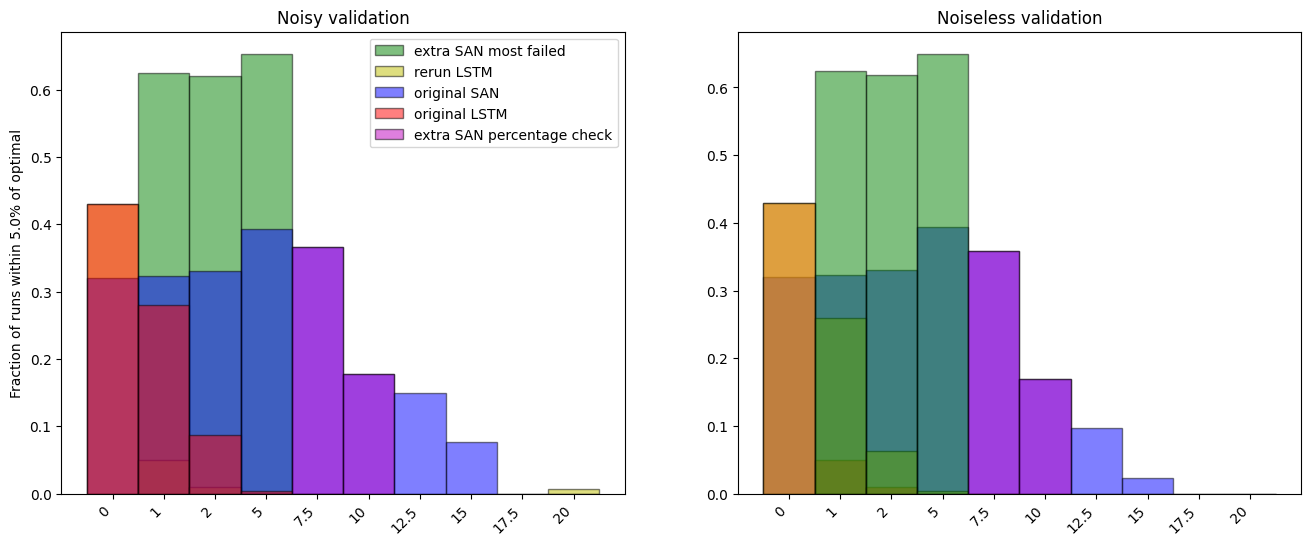

In [41]:
def fraction_within_epsilon_of_target(accs, target, epsilon=0.01):
    return np.sum(np.abs(accs - target) < epsilon) / len(accs)


bf_vals = BF_VALS[4]
df_sparity = pd.read_csv(f"{target_directory}{SPREADSHEET_NAMES[4]}.csv")
df_sparity_ana = pd.read_csv(f"{target_directory}{SPREADSHEET_NAMES[4]}_ana.csv")
entropies = df_sparity_ana["entropy"].values.flatten()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
entropies = df_sparity_ana["entropy"].values.flatten()
# make widths that are diffs of each consecutive entropy value
diffs = np.diff(entropies)
# add a final width of 1 - last entropy value
widths = np.concatenate([diffs, [1 - entropies[-1]]])
# fig, axes = plt.subplots(len(bf_vals), 2, figsize=(6, 12), sharex=True, sharey=True, constrained_layout=True)
zzz = True
for i, bf in enumerate(bf_vals):
    df_rnn_bf = df_sparity.loc[df_sparity["bf"] == bf].loc[df_sparity["model"] == "RNN"]
    df_san_bf = df_sparity.loc[df_sparity["bf"] == bf].loc[df_sparity["model"] == "SAN"]
    df_rnn_rerun_bf = df_sparity_rerun.loc[df_sparity_rerun["bf"] == bf] # the rerun sheet has a different format
    df_san_rerun_bf = df_sparity_san_rerun.loc[df_sparity_san_rerun["bf"] == bf]
    df_san_rerun_bf_2 = df_sparity_san_rerun_2.loc[df_sparity_san_rerun_2["bf"] == bf]

    mle_noiseless = df_sparity_ana.loc[df_sparity_ana["bf"] == bf/100]["mle_noiseless"].values.flatten()
    mle_noisy = df_sparity_ana.loc[df_sparity_ana["bf"] == bf/100]["mle_noisy"].values.flatten()

    epsilon = 0.05
    # compute fractions of models that achieved (noisy) MLE performance
    san_val_frac = fraction_within_epsilon_of_target(df_san_bf['val_acc'].values, mle_noisy, epsilon=epsilon)
    rerun_rnn_val_frac = fraction_within_epsilon_of_target(df_rnn_bf['val_acc'].values, mle_noisy, epsilon=epsilon)
    rnn_val_frac = fraction_within_epsilon_of_target(df_rnn_rerun_bf['val_acc'].values, mle_noisy, epsilon=epsilon)
    san_rerun_val_frac = fraction_within_epsilon_of_target(df_san_rerun_bf['val_acc'].values, mle_noisy, epsilon=epsilon)
    san_rerun_val_frac_2 = fraction_within_epsilon_of_target(df_san_rerun_bf_2['val_acc'].values, mle_noisy, epsilon=epsilon)

    width = 1
    axes[0].bar(i, san_rerun_val_frac, width=width, color='g', alpha=0.5, align='center', edgecolor='k', label="extra SAN most failed" if zzz else None)
    axes[0].bar(i, rerun_rnn_val_frac, width=width, color='y', alpha=0.5, align='center', edgecolor='k', label="rerun LSTM" if zzz else None)
    axes[0].bar(i, san_val_frac, width=width, color='b', alpha=0.5, align='center', edgecolor='k', label="original SAN" if zzz else None)
    axes[0].bar(i, rnn_val_frac, width=width, color='r', alpha=0.5, align='center', edgecolor='k', label="original LSTM" if zzz else None)
    axes[0].bar(i, san_rerun_val_frac_2, width=width, color='m', alpha=0.5, align='center', edgecolor='k', label="extra SAN percentage check" if zzz else None)
    zzz = False
    axes[0].legend(loc="upper right")
    axes[0].set_title("Noisy validation")
    axes[0].set_ylabel(f"Fraction of runs within {epsilon*100}% of optimal")
    # compute fractions of models that achieved (noiseless) MLE performance
    san_noiseless_val_frac = fraction_within_epsilon_of_target(df_san_bf['noiseless_val_acc'].values, mle_noiseless, epsilon=epsilon)
    rnn_noiseless_val_frac = fraction_within_epsilon_of_target(df_rnn_bf['noiseless_val_acc'].values, mle_noiseless, epsilon=epsilon)
    rerun_rnn_noiseless_val_frac = fraction_within_epsilon_of_target(df_rnn_rerun_bf['noiseless_val_acc'].values, mle_noiseless, epsilon=epsilon)
    san_rerun_noiseless_val_frac = fraction_within_epsilon_of_target(df_san_rerun_bf['noiseless_val_acc'].values, mle_noiseless, epsilon=epsilon)
    san_rerun_noiseless_val_frac_2 = fraction_within_epsilon_of_target(df_san_rerun_bf_2['noiseless_val_acc'].values, mle_noiseless, epsilon=epsilon)
    
    axes[1].bar(i, san_noiseless_val_frac, width=width, color='b', alpha=0.5, label='SAN [noiseless]', align='center', edgecolor='k')
    axes[1].bar(i, rnn_noiseless_val_frac, width=width, color='r', alpha=0.5, label='RNN [noiseless]', align='center', edgecolor='k')
    axes[1].bar(i, rerun_rnn_noiseless_val_frac, width=width, color='y', alpha=0.5, label='RNN [rerun] [noiseless]', align='center', edgecolor='k')
    axes[1].bar(i, san_rerun_noiseless_val_frac, width=width, color='g', alpha=0.5, label='SAN [rerun] [noiseless]', align='center', edgecolor='k')
    axes[1].bar(i, san_rerun_noiseless_val_frac_2, width=width, color='m', alpha=0.5, label='SAN [rerun 2] [noiseless]', align='center', edgecolor='k')
    axes[1].set_title("Noiseless validation")


entropy_rounded = np.round(entropies, 3)
for ax in axes:
    ax.set_xticks(range(len(bf_vals)), bf_vals, rotation=45, ha='right')
    # ax.set_xticks(range(len(bf_vals)), entropy_rounded, rotation=45, ha='right')

(array([14.42188625,  0.        ,  0.07210943,  0.        ,  0.07210943,
         0.        ,  0.        ,  0.07210943,  0.        ,  6.99461483]),
 array([0.50139776, 0.5476238 , 0.59384984, 0.64007588, 0.68630192,
        0.73252796, 0.77875399, 0.82498003, 0.87120607, 0.91743211,
        0.96365815]),
 <BarContainer object of 10 artists>)

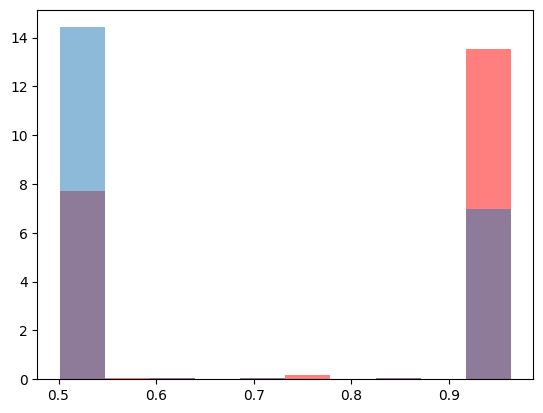

In [55]:
fig, ax = plt.subplots()
df_san_rerun_bf = df_sparity_san_rerun.loc[df_sparity_san_rerun["bf"] == 1]
df_san_original = df_sparity.loc[df_sparity["bf"] == 1].loc[df_sparity["model"] == "SAN"]
# print(df_san_rerun_bf["val_acc"].values)
# print(df_san_original["val_acc"].values)
ax.hist(df_san_rerun_bf["val_acc"].values, alpha=0.5, color='r', density=True)
ax.hist(df_san_original["val_acc"].values, alpha=0.5, density=True)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.10285842, 0.25714606, 0.09714407,
        0.16000199, 0.26857478, 0.22857428, 0.25714606, 0.20000249,
        0.14857328, 0.18857378, 0.19428814, 0.26286042, 0.26286042,
        0.20571685, 0.18285942, 0.22285992, 0.18857378, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([-11.51292546, -11.22126243, -10.9295994 , -10.63793637,
        -10.34627334, -10.05461031,  -9.76294727,  -9.47128424,
         -9.17962121,  -8.88795818,  -8.59629515,  -8.30463211,
         -8.01296908,  -7.72130605,  -7.42964302,  -7.13797999,
         -6.84631696,  -6.55465392,  -6.26299089,  -5.97132786,
         -5.67966483,  -5.3880018 ,  -5.09633876,  -4.80467573,
         -4.5130127 ,  -4.22134967,  -3.92968664,  -3.6380236 ,
         -3.34636057,  -3.05469754,  -2.76303451]),
 <BarContainer object of 30 artists>)

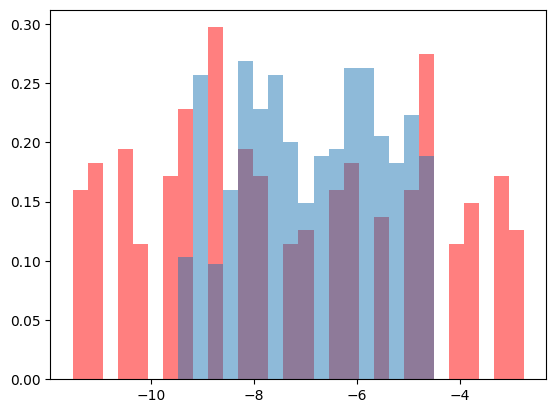

In [64]:
fig, ax = plt.subplots()
cts, bins, _ = ax.hist(np.log(df_san_original["lr"].values), alpha=0.5, color='r', density=True, bins=30)
ax.hist(np.log(df_san_rerun_bf["lr"].values), alpha=0.5, density=True, bins=bins)

# for col in ["depth", "d_model", "heads", "d_ffn"]:
#     fig, ax = plt.subplots()
#     ax.hist(df_san_original[col].values, alpha=0.5, color='r', density=True)
#     ax.hist(df_san_rerun_bf[col].values, alpha=0.5, density=True)


In [54]:
len(df_san_rerun_bf)

600

In [12]:
rnn_noiseless_val_frac

np.float64(0.0)